In [1]:
#!pip install yfinance
#!pip install yahoofinancials
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, r2_score

[*********************100%***********************]  1 of 1 completed


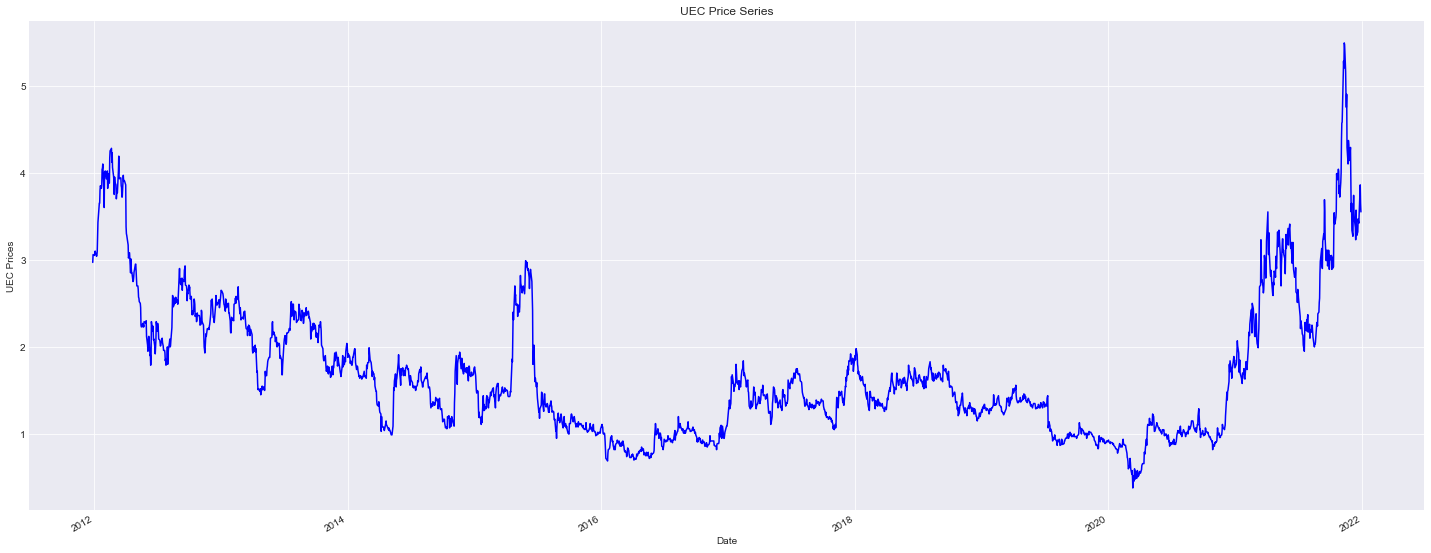

In [2]:
Df = yf.download('UEC', '2011-12-30', '2021-12-30', auto_adjust=True)
Df = Df.dropna()
Df.Close.plot(figsize=(25,10),color='b')
plt.ylabel("UEC Prices")
plt.title("UEC Price Series")
plt.show()

In [3]:
Df = Df[['Close']]
Df

,Close
Date,
2011-12-29,2.97
2011-12-30,3.06
2012-01-03,3.05
2012-01-04,3.08
2012-01-05,3.10
...,...
2021-12-22,3.44
2021-12-23,3.42
2021-12-27,3.86


Text(0, 0.5, 'Price')

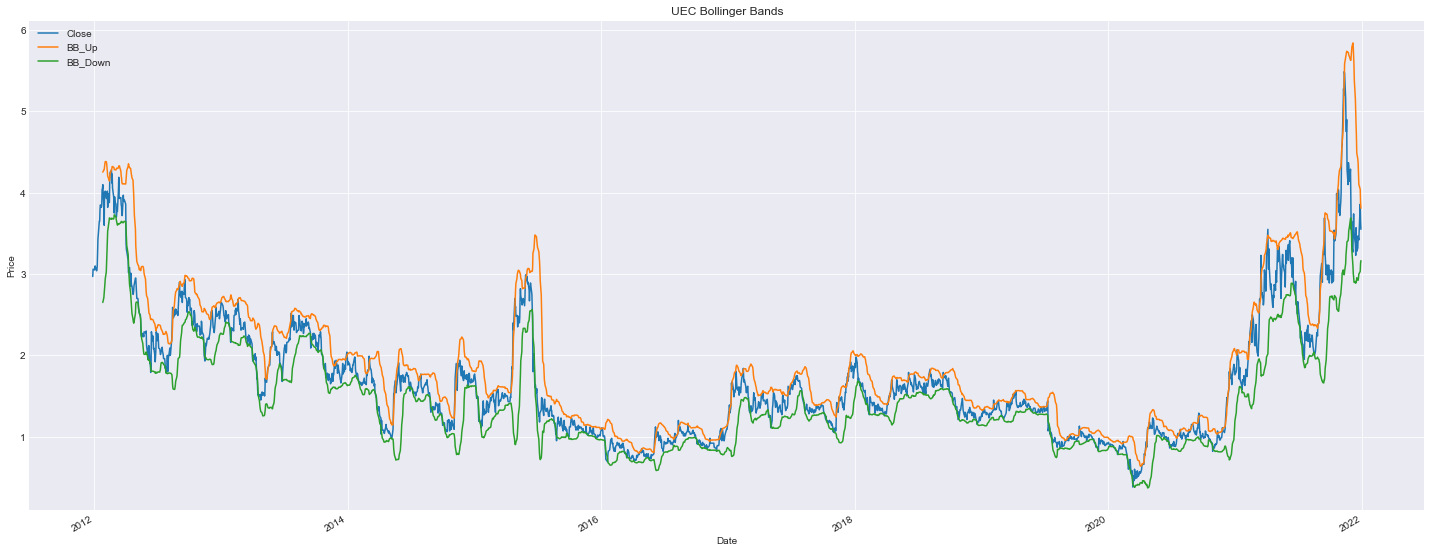

In [4]:
Df['std'] = Df['Close'].rolling(window=20).std(ddof=0) 
Df['MA'] = Df['Close'].rolling(window=20).mean()
Df['BB_Up'] = Df['MA'] + 2*Df['std']
Df['BB_Down'] = Df['MA'] - 2*Df['std'] 
Df.head(30)
df=Df[['Close', 'BB_Up', 'BB_Down']].plot(figsize=(25,10))
plt.grid(True)
plt.title('UEC Bollinger Bands')
plt.axis('tight')
plt.ylabel('Price')

The independent variables in this project are the moving averages (MA) for the past three(3) days and nine(9) days. We store the feature variables in X.

In [5]:
Df['MA_3'] = Df['Close'].rolling(window=3).mean()
Df['MA_9'] = Df['Close'].rolling(window=9).mean()
Df['NEXT_DAY_PRICE'] = Df['Close'].shift(-1)
Df = Df.dropna()
X = Df[['MA_3', 'MA_9']]
y = Df['NEXT_DAY_PRICE']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting multiple linear regression- 
Then we use the fit method to fit the independent and dependent variables to generate coefficient and constant for regression.

In [7]:
linear = LinearRegression().fit(X_train, y_train)
print("Multivariate Linear Regression Model")
print("Uranium Price (y) = %.2f * 3 Days Moving Average(MA)) (x1) \
+ %.2f * 9 Days Moving Average(MA) (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Multivariate Linear Regression Model
Uranium Price (y) = 1.18 * 3 Days Moving Average(MA)) (x1) + -0.19 * 9 Days Moving Average(MA) (x2) + 0.02 (constant)


Now we predict the prices using the linear model created using the training dataset to check if the model works in the test dataset. Besides graph shows the predicted and actual price of Uranium (UEC).

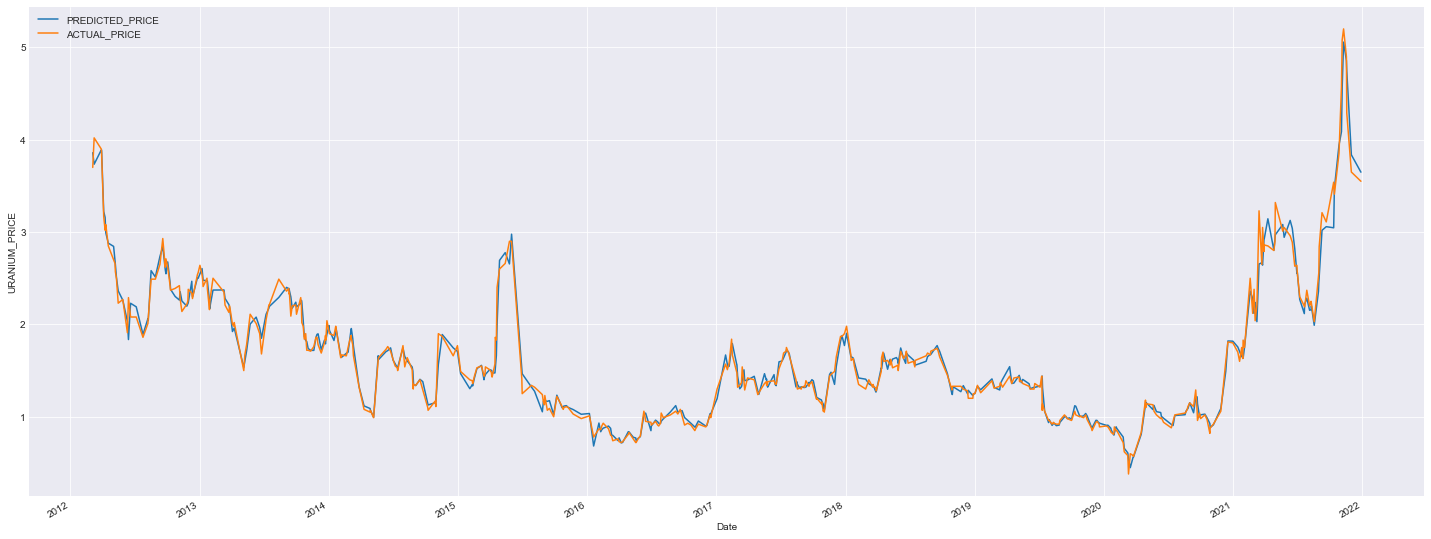

In [8]:
PREDICTED_PRICE = linear.predict(X_test)
PREDICTED_PRICE = pd.DataFrame(
    PREDICTED_PRICE, index=y_test.index, columns=['PRICE'])
PREDICTED_PRICE.plot(figsize=(25,10))
y_test.plot()
plt.legend(['PREDICTED_PRICE', 'ACTUAL_PRICE'])
plt.ylabel("URANIUM_PRICE")
plt.show()

In [9]:
PREDICTED_PRICE

,PRICE
Date,
2021-03-09,2.029645
2021-08-10,2.200224
2015-08-28,1.053794
2020-12-17,1.820762
2017-03-08,1.302939
...,...
2020-03-25,0.562081
2019-06-18,1.319348
2019-06-20,1.318058


Performance Metrics

In [10]:
print("Mean Absolute Error(MAE):", mean_absolute_error(y_test, PREDICTED_PRICE))
print("R-Square Score:", r2_score(y_test, PREDICTED_PRICE))

Mean Absolute Error(MAE): 0.06367560306142671
R-Square Score: 0.9806877582009602


A score close to 100% indicates that the model explains the UEC prices well.